In [1]:
!pip install pandas numpy scikit-learn matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

nodes_df = pd.read_csv('nodes (1).csv', delimiter=';')  
edges_df = pd.read_csv('edges (1).csv', delimiter=';')  
print(nodes_df.head()) 
print(edges_df.head())

   id  pos_x  pos_y  pos_z  degree  isAtSampleBorder
0   0 -255.0  -37.0    0.0       1                 1
1   1 -163.0  -47.0    0.0       1                 1
2   2 -194.0  -63.0    0.0       1                 1
3   3 -143.0 -103.0    0.0       1                 1
4   4 -154.0 -108.0    0.0       1                 1
   id  node1id  node2id    length  distance  curveness  volume  \
0   0        0     1632  38.52110  38.06570    1.01196    2428   
1   1        1     1546   8.23774   8.06226    1.02177     599   
2   2        2     1582  18.37120  18.05550    1.01749    1321   
3   3        3     1748  94.98180  86.36550    1.09977    7561   
4   4        4     1550   8.31949   8.06226    1.03191     586   

   avgCrossSection  minRadiusAvg  minRadiusStd  avgRadiusAvg  avgRadiusStd  \
0          63.0303       3.47230      0.427332       4.63686      0.346091   
1          72.7141       4.59982      0.635213       5.70909      1.165760   
2          71.9060       4.09335      0.465295     

In [3]:
node_coordinates = nodes_df[['pos_x', 'pos_y', 'pos_z']].values
print(node_coordinates)

[[-255.     -37.       0.   ]
 [-163.     -47.       0.   ]
 [-194.     -63.       0.   ]
 ...
 [-185.    -136.     585.   ]
 [ -23.    -161.     585.   ]
 [-189.333 -133.167  584.667]]


In [4]:
node_coordinates = nodes_df[['pos_x', 'pos_y', 'pos_z']].values

In [5]:
from sklearn.neighbors import KDTree

kd_tree = KDTree(node_coordinates)

In [6]:
distances, indices = kd_tree.query(node_coordinates[0].reshape(1, -1), k=3)
print(f"Indices of the closest points: {indices}")
print(f"Distances to the closest points: {distances}")

Indices of the closest points: [[ 0 66 17]]
Distances to the closest points: [[ 0.         20.90454496 32.93933818]]


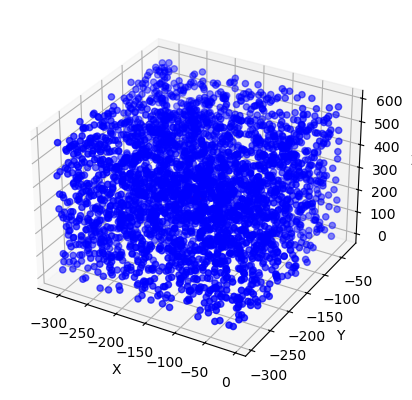

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(nodes_df['pos_x'], nodes_df['pos_y'], nodes_df['pos_z'], color='b', label='Nodes')

for i in indices[0]:
    ax.scatter(nodes_df.iloc[i]['pos_x'], nodes_df.iloc[i]['pos_y'], nodes_df.iloc[i]['pos_z'], color='r', label='Nearest Neighbor')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [17]:
distances, indices = kd_tree.query(node_coordinates[5].reshape(1, -1), k=3)
print(f"Indices of the closest points for node 5: {indices}")
print(f"Distances to the closest points for node 5: {distances}")

Indices of the closest points for node 5: [[ 5 43 44]]
Distances to the closest points for node 5: [[ 0.         27.27636339 31.46426545]]


In [19]:
for neighbor in indices[0][1:]:  
    node1 = 5  
    node2 = neighbor  
    if ((edges_df['node1id'] == node1) & (edges_df['node2id'] == node2)).any() or \
       ((edges_df['node1id'] == node2) & (edges_df['node2id'] == node1)).any():
        print(f"Node {node1} and Node {node2} are connected.")
    else:
        print(f"Node {node1} and Node {node2} are NOT connected.")

Node 5 and Node 43 are NOT connected.
Node 5 and Node 44 are NOT connected.


In [21]:
distances_43, indices_43 = kd_tree.query(node_coordinates[43].reshape(1, -1), k=3)
print(f"Nearest neighbors for Node 43: {indices_43}, Distances: {distances_43}")
distances_44, indices_44 = kd_tree.query(node_coordinates[44].reshape(1, -1), k=3)
print(f"Nearest neighbors for Node 44: {indices_44}, Distances: {distances_44}")

Nearest neighbors for Node 43: [[  43    5 1555]], Distances: [[ 0.         27.27636339 27.36786437]]
Nearest neighbors for Node 44: [[  44   76 1602]], Distances: [[ 0.         16.73320053 21.        ]]


In [23]:
connection_43_44 = edges_df[(edges_df['node1id'] == 43) & (edges_df['node2id'] == 44)]
if connection_43_44.empty:
    print("Node 43 and Node 44 are NOT connected in edges.csv.")
else:
    print("Node 43 and Node 44 are connected in edges.csv.")

Node 43 and Node 44 are NOT connected in edges.csv.


In [25]:
import networkx as nx

G = nx.Graph()
for index, row in edges_df.iterrows():
    G.add_edge(row['node1id'], row['node2id'])

if nx.has_path(G, 43, 44):
    print("Node 43 and Node 44 are connected indirectly.")
else:
    print("Node 43 and Node 44 are NOT connected.")

Node 43 and Node 44 are connected indirectly.


In [26]:
G = nx.Graph()
for index, row in edges_df.iterrows():
    G.add_edge(row['node1id'], row['node2id'])

shortest_path = nx.shortest_path(G, source=43, target=44)
print(f"Shortest path between Node 43 and Node 44: {shortest_path}")

Shortest path between Node 43 and Node 44: [43, 1555.0, 44.0]


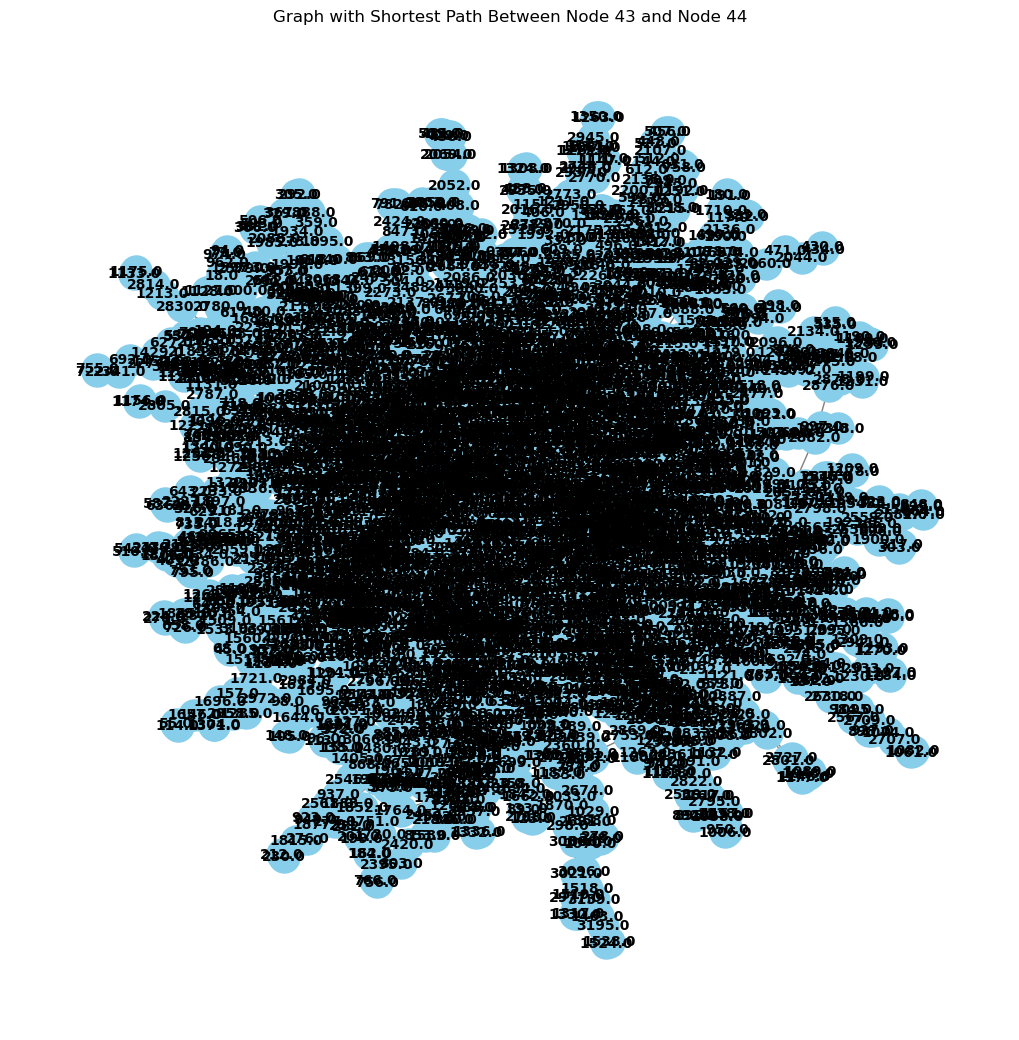

In [29]:
G = nx.Graph()
for index, row in edges_df.iterrows():
    G.add_edge(row['node1id'], row['node2id'])

shortest_path = [43, 1555.0, 44.0]

pos = nx.spring_layout(G) 
plt.figure(figsize=(10, 10))

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')

path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

plt.title("Graph with Shortest Path Between Node 43 and Node 44")
plt.show()

In [30]:
connected_components = list(nx.connected_components(G))
print(f"Connected Components: {connected_components}")

Connected Components: [{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 1

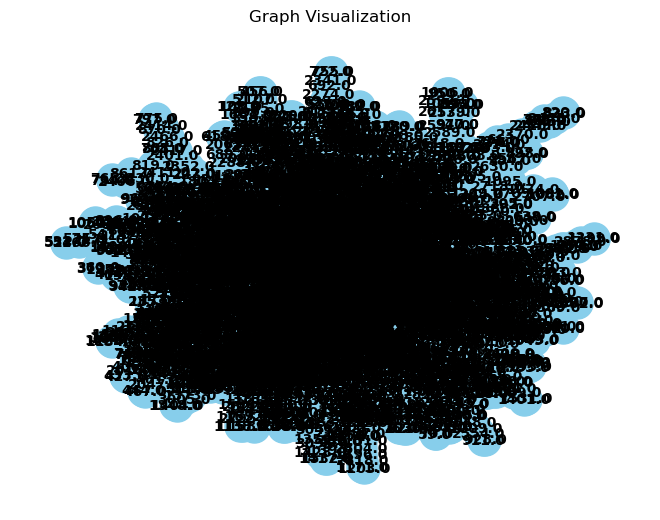

In [31]:
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph Visualization")
plt.show()

In [32]:
!pip install python-louvain


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Communities: {0.0: 0, 1632.0: 0, 1.0: 1, 1546.0: 1, 2.0: 2, 1582.0: 2, 3.0: 3, 1748.0: 3, 4.0: 3, 1550.0: 3, 5.0: 5, 1788.0: 5, 6.0: 6, 1816.0: 6, 7.0: 7, 1774.0: 7, 8.0: 8, 1631.0: 8, 9.0: 9, 1693.0: 9, 10.0: 2, 1642.0: 2, 11.0: 9, 1679.0: 9, 12.0: 7, 1658.0: 7, 13.0: 10, 1553.0: 10, 14.0: 10, 1629.0: 10, 15.0: 2, 1559.0: 2, 16.0: 9, 1580.0: 9, 17.0: 2, 1564.0: 2, 18.0: 3, 1600.0: 3, 19.0: 10, 1593.0: 10, 20.0: 2, 1656.0: 2, 21.0: 1, 1565.0: 1, 22.0: 2, 1549.0: 2, 23.0: 2, 1627.0: 2, 24.0: 8, 1552.0: 8, 25.0: 10, 1573.0: 10, 26.0: 2, 1554.0: 2, 27.0: 2, 1584.0: 2, 28.0: 9, 1610.0: 9, 29.0: 1, 1547.0: 1, 30.0: 1, 1586.0: 1, 31.0: 8, 1556.0: 8, 32.0: 1, 1602.0: 1, 33.0: 2, 1578.0: 2, 34.0: 9, 1579.0: 9, 35.0: 3, 1562.0: 3, 36.0: 10, 1718.0: 10, 37.0: 9, 1604.0: 9, 38.0: 2, 1558.0: 2, 39.0: 9, 40.0: 2, 1601.0: 2, 41.0: 1, 1587.0: 1, 42.0: 1, 1577.0: 1, 43.0: 8, 1555.0: 8, 44.0: 8, 45.0: 10, 1560.0: 10, 46.0: 3, 1569.0: 3, 47.0: 9, 1572.0: 9, 48.0: 2, 1563.0: 2, 49.0: 10, 1585.0: 10, 50.0

C:\Users\lenovo\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


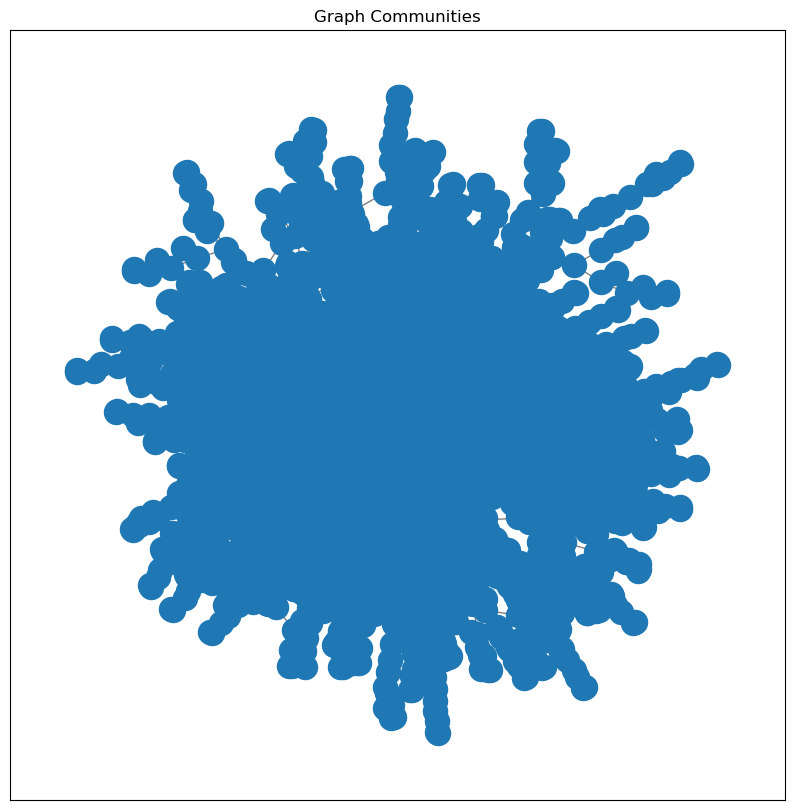

In [34]:
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for index, row in edges_df.iterrows():
    G.add_edge(row['node1id'], row['node2id'])

partition = community_louvain.best_partition(G)

print(f"Communities: {partition}")
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=300, cmap=plt.cm.jet)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Graph Communities")
plt.show()

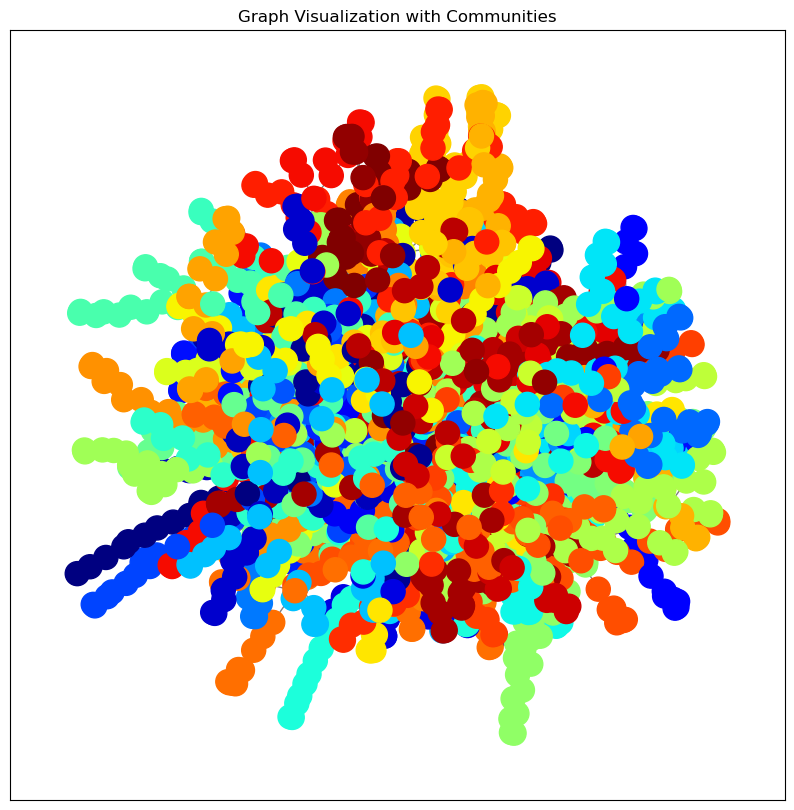

Community 0: Most central nodes: [(1746.0, 0.0015644555694618273), (1615.0, 0.0012515644555694619), (1743.0, 0.0012515644555694619)]
Community 1: Most central nodes: [(2783.0, 0.0009386733416770964), (2860.0, 0.0009386733416770964), (2807.0, 0.0009386733416770964)]
Community 2: Most central nodes: [(1748.0, 0.0009386733416770964), (1600.0, 0.0009386733416770964), (1597.0, 0.0009386733416770964)]
Community 3: Most central nodes: [(1550.0, 0.0009386733416770964), (1774.0, 0.0009386733416770964), (1658.0, 0.0009386733416770964)]
Community 4: Most central nodes: [(2780.0, 0.0009386733416770964), (2787.0, 0.0009386733416770964), (2814.0, 0.0009386733416770964)]
Community 5: Most central nodes: [(1816.0, 0.0012515644555694619), (1945.0, 0.0012515644555694619), (1662.0, 0.0009386733416770964)]
Community 6: Most central nodes: [(1788.0, 0.0009386733416770964), (1631.0, 0.0009386733416770964), (1552.0, 0.0009386733416770964)]
Community 7: Most central nodes: [(1679.0, 0.0012515644555694619), (1

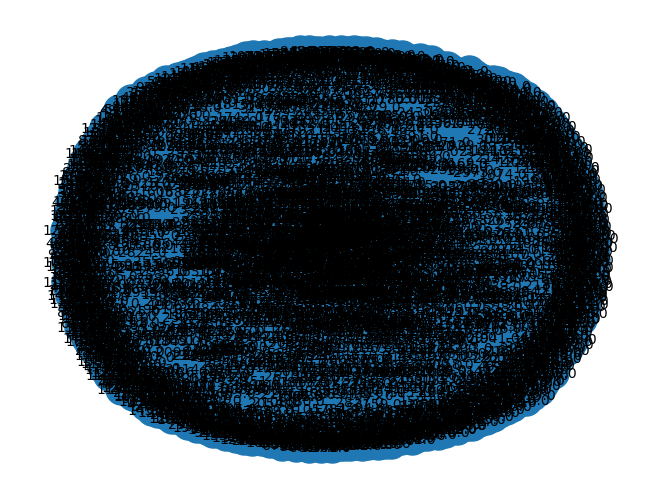

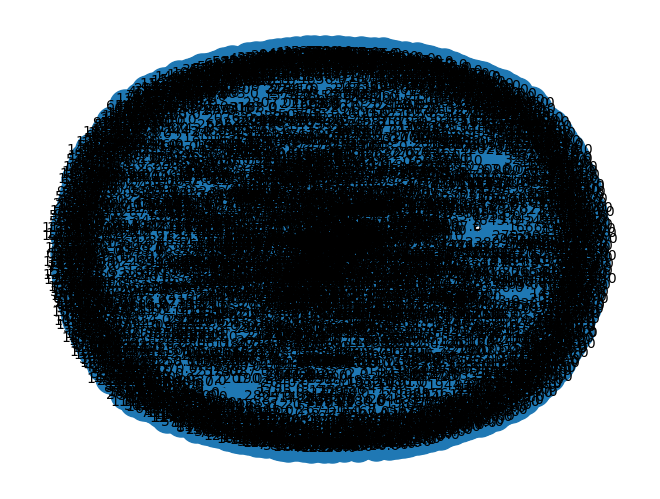

Top 5 nodes with highest betweenness centrality: [(2522.0, 0.2400081609575879), (2099.0, 0.22642998583910617), (2444.0, 0.21060569974335275), (2622.0, 0.20825145281366825), (2763.0, 0.20456245841992265)]


In [36]:
G = nx.Graph()
for index, row in edges_df.iterrows():
    G.add_edge(row['node1id'], row['node2id'])

partition = community_louvain.best_partition(G)

pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))

nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=300, cmap=plt.cm.jet, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Graph Visualization with Communities")
plt.show()

degree_centrality = nx.degree_centrality(G)

central_nodes = {community: [] for community in set(partition.values())}

for node, comm in partition.items():
    central_nodes[comm].append((node, degree_centrality[node]))

for comm in central_nodes:
    central_nodes[comm] = sorted(central_nodes[comm], key=lambda x: x[1], reverse=True)

for comm, nodes in central_nodes.items():
    print(f"Community {comm}: Most central nodes: {nodes[:3]}")

community_1_nodes = [node for node, comm in partition.items() if comm == 1]
community_2_nodes = [node for node, comm in partition.items() if comm == 2]

shortest_path = nx.shortest_path(G, source=43, target=44)
print(f"Shortest path between Node 43 and Node 44: {shortest_path}")

threshold_distance = 50
indices_within_threshold_43 = kd_tree.query_radius(node_coordinates[43].reshape(1, -1), r=threshold_distance)
print(f"Indices within {threshold_distance} units of Node 43: {indices_within_threshold_43}")

bfs_tree = nx.bfs_tree(G, source=43)
nx.draw(bfs_tree, with_labels=True, node_size=500, font_size=10)
plt.show()

dfs_tree = nx.dfs_tree(G, source=43)
nx.draw(dfs_tree, with_labels=True, node_size=500, font_size=10)
plt.show()

betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes with highest betweenness centrality:", top_betweenness_centrality)

In [42]:
def filter_nodes_by_radius(nodes_df, edges_df, top_percent=10, k=3):
    top_edges = edges_df.nlargest(int(len(edges_df) * top_percent / 100), 'avgRadiusAvg')
    node_coordinates = nodes_df[['pos_x', 'pos_y', 'pos_z']].values
    kd_tree = KDTree(node_coordinates)
    filtered_results = []
    
    for _, row in top_edges.iterrows():
        node1, node2 = row['node1id'], row['node2id']
        
        node1_index = nodes_df[nodes_df['id'] == node1].index[0]
        node2_index = nodes_df[nodes_df['id'] == node2].index[0]
        
        distances, indices = kd_tree.query(node_coordinates[[node1_index, node2_index]], k=k)
        
        if ((edges_df['node1id'] == node1) & (edges_df['node2id'] == node2)).any() or \
           ((edges_df['node1id'] == node2) & (edges_df['node2id'] == node1)).any():
            filtered_results.append((node1, node2, distances))
    
    return filtered_results

In [44]:
filtered_results = filter_nodes_by_radius(nodes_df, edges_df, top_percent=10)

# Print filtered results to verify
for result in filtered_results:
    print(f"Nodes {result[0]} and {result[1]} are connected with distances: {result[2]}")

Nodes 1854.0 and 1876.0 are connected with distances: [[0.         4.17317228 5.54526825]
 [0.         5.54526825 7.81038199]]
Nodes 1820.0 and 1869.0 are connected with distances: [[ 0.         11.53276493 15.26433752]
 [ 0.          7.48331477 15.26433752]]
Nodes 2283.0 and 2422.0 are connected with distances: [[ 0.         14.73091986 20.82238646]
 [ 0.          6.78232998 19.74841766]]
Nodes 1642.0 and 1820.0 are connected with distances: [[ 0.          2.82842712 19.74841766]
 [ 0.         11.53276493 15.26433752]]
Nodes 10.0 and 1642.0 are connected with distances: [[ 0.         18.86796226 22.69361144]
 [ 0.          2.82842712 19.74841766]]
Nodes 1999.0 and 2003.0 are connected with distances: [[ 0.          4.46766158 27.43498618]
 [ 0.          4.46766158 29.71464285]]
Nodes 1869.0 and 1884.0 are connected with distances: [[ 0.          7.48331477 15.26433752]
 [ 0.          7.48331477 22.04540769]]
Nodes 8.0 and 1631.0 are connected with distances: [[ 0.         22.82542442 